# Multi Layer Perceptron Neural Network

## Biological neuron

<img src="img/neuron.png" width="50%">

A neuron, is an electrically excitable cell that receives, processes, and transmits information through electrical and chemical signals. They made of a cell body (soma), dendrites and an axon.

- Dendrite: It receives signals from other neurons
- Soma: It sums all the incoming signals to generate input
- Axon: When the sum reaches a threshold value, sends the signal to the synapse
- Synapses: The point of interconnection of one neuron with other neurons

## Artificial neuron

<img src="img/aneuron.png" width="50%">

Simlulates the structure of a biological neron. As of the simplicity of derivative calculatoin, it uses sum of product of input and coresponding weights. It fires, if the summation reachs to a threshhold. Note that, because of good approximation of fuzzy activations, the function $f$ maybe more complex than simple threshhold function. This functions should be continous and differentiable. For example, tanh, relu and its variants, sigmoid and radial basis functions are some of them. Same as linear regression, by finding set of appropreate weights, we can solve a linear regression problem with this approach

## Artificial neural network

<img src="img/ann.png" width="70%">

An artificial neural network consist of many single neurons connected to each other with a specific structure. Multi layer perceptron (MLP) is a most basic network which neurons are stacked in several layers. Convolutional and recurrent neural networks are other types of ANNs. By training a netwrok we can find optimal weights which leads to a good approximation of desirerd dataset. This process can be devided into three major phases:

- Forward pass
- Backward pass
- Updating weights

### Forward pass

Suppose a $d$-dimensional dataset constains $n$ different samples named $X^{n\times d}$ and $k$-dimensional target values $Y^{n\times k}$. By defining a weight matrix $W_{1}^{d\times h1}$ and using matrix multiplication we have

$Z^{(1)} = X \cdot W_1$

which $Z^{(1)}$ denotes first hidden layer of network. This proccess is equal to apply simple weighted summation for whole dataset and by applying a nonlinear actiovation function we have

$a^{(1)} = \sigma(Z^{(1)})$

It's clear that the shape of $a^{(1)}$ is $(n \times h1)$. we can repeat this procees. So we have

$Z^{(i)} = a^{(i-1)} \cdot W_i$

$a^{(i)} = \sigma(Z^{(i)})$

for $i=2,\ldots,r$. In the last layer, we have

$Z^{(r)} = a^{(r-1)} \cdot W_r$

$\hat{y} = \sigma(Z^{(r)})$

which $\hat{y}$ is the prediction of neural network w.r.t input data $X$ and weights $\{W_i\}_{i=1}^r$.

### Loss function

To see the accuracy of the network, we need a measure function to show the cost of prediction. The most known loss functions are mean squared error (MSE) end cross entropy (Xentropy) which are used in regression and classifications tasks, respectively. There are many other loss functions such as mean absolute error, Vapnik's $\epsilon$-insensetive loss function, etc. Here we explain MSE loss function:

$J_{MSE}(W) ={\frac {1}{n}}\sum\limits_{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}$


### Backward pass

To find optimal weights with mathemathic optimization tools, we need the derivative of loss function w.r.t weights $W_{i,j}^r$. Here we provide a well known thechnique known as Backpropagation.
by defining

$\delta^{(l)} = -(y - a^{(l)})\odot\sigma'(z^{(l)})$

for last layer and 

$\delta^{(l)} = (\delta^{(l + 1)} \cdot W_{l}^{\intercal})\odot\sigma'(z^{(l)})$

the drivatives can be computed by

$\displaystyle\frac{\partial J(W)}{\partial W_{l}} = a^{(l)\intercal} \cdot \delta^{(l + 1)}$

### Finding optimal weights

<img src="img/optimizer.png" width="50%">

Function minimization is an essential topic in mathematics. When the function $f(x)$ has quaratic form, there is special optimizers which can rich global minimum efficiently. But for arbitrary nonlinear functions we need to use some parametric iterative algoithms to reach the a minimum point that maybe is a local. Based of the derviate order needed by algorithms the classified into two categories known as first and second order methods. While first order methods need to save gradient vector in memoty, second order optimizers save a matrix of derivatives. Since these methods are very memory intensive for large datasets, some algorithms are developed which approximate that matrix among gradient calculation. The most known algorithms is Limited memory-BFGS (L-BFGS). Because of simple implementation, here we explain gradient descent algorthm which is a very basic first order optimizer.

By starting from an intial point $w_0$ and goal function $L$, we can reach a local minimum with this update rule:

$w_i = w_i - \eta \frac{\partial L}{\partial w_i}$

where $\eta$ called step length or learning rate. Note that, by choosing appropreate value for step length we can reach global minimum. To accelerate the learning process, researchers extened this update rule by adding some terms or changing step length base on some conditions. Momentom, Nestrov, Adagrad, AdaDelta, RMSProp, Adam are some extensions of vanilla gradient descent.

### Weight regularization

There are several techniques which are used overcome the overfitting problem. Among them weight decacy and dropout are major methods. In weight decacy, we add a positive function of unknonw weights to the loss function. This leads to small weights and help us to prevent overfitting. because of simplicity here we explin L2-regularization which is named as tikhonov regularization in mathematics.
This regularization, can be defined by adding $\sum_{i=1}^r || W ||$

## Implementation

### Preprocessing
In all of the examples, we first normalize input data by subtracting mean of a column for each data sample then deviding it by variance of column.
In the regression datasets, we do the same scaling on target values, but in the classification tasks, we use one-hot encoding.

### MLP class

The implementation of our MLP class is defind as a simple class named MLP. 


    MLP(hidden_layer, activation, epoch, eta, beta, alpha, mu, batch_size, verbose, task)


- hidden_layer: A list where each item defines the number of neurons in the hidden layer. It's obvious that, the length of list denotes number of hidden layers.
- activation: A single class that inherints Activation class and applied to each layer. Default choises are Sigmoid, Tanh, ReLU and LeakyReLU.
- epoch: The number of iterations.
- eta: Step length or learning rate
- beta: A number which multiplied to inital weights, initial weights have normal distribution
- alpha: Regularization coeficient
- mu: Momentum parameter
- batch_size: The number of batch passed to batch gradient descent
- verbose: (optional) Use this to show the loss of i-th iteration.
- task: Must be one of **regression** or **classification**. Based on task, this class encodes output values and also chooses activation function of last layer automatically.

This class implements this methods:


    - fit(x_train, y_train, validation: optional = list(x_valid, y_valid))
    - predict(x)
    - score(x,y)
- fit function returns the pair (history, validation_history) if the validation set was set. Otherwise it returs history of training phase. Each of these, containts a 2d numpy awway with the shape of (n_iterations, 2). The columns contain loss and score history during training phase, respectively.

- predict function returns the predicted values for input x.
- score functions returns the score of model with input x and output y. This function uses `accuracy_score` and `r2_score` metrics implemented in scikit-learn module for classification and regression tasks.

## Hyperparameter tuning

To find optimal architecture of network, grid seach is a simple and efficient way. By passing a set of different possible choises for a problem, the following class runs and saves all possible architectures and their coresponding loss history.

    MLPGridSearch(task, hidden_layers, activations, batch_sizes, epochs, mus, betas, etas, alphas, filename)

A **parallelization** technique for multi-core processors has been implemented to speedup searching process.

# Datasets

In [1]:
from result_analyzer import *
from nn.mlp.activations import *

In [2]:
%%html
<style>
table.dataframe {
    margin: 10px auto !important;
    border: 1px solid #cfcfcf;
    width: 100%;
}
table.dataframe * {
    text-align:center !important;
}
</style>

## Iris dataset

<img src='img/iris.png' width="500px">

Input data: 4 features of 150 iris flowers

Target value: 3 different type of iris

[More information in UCI repository](https://archive.ics.uci.edu/ml/datasets/Iris)

The grid search parameters for this dataset constructed by:

In [3]:
hidden_layers = [(5, 5, 5, 5), (10, 10, 5), (15, 15), (20, 15, 10), (32,)]
activations = [Tanh(), LeakyReLu(.1), ReLu()]
batch_sizes = [16, 64, 128]
epochs = [300]
mus = [0, .8]
betas = [.3]
etas = [.01, 0.001]
alphas = [.001, .01, 0]

hidden_layer      activation  epoch   eta  beta  alpha   mu  batch_size  \
0   (10, 10, 5)            ReLu    300  0.01   0.3   0.01  0.8          16   
1   (10, 10, 5)  LeakyReLu(0.1)    300  0.01   0.3   0.01  0.8          16   
2      (15, 15)            Tanh    300  0.01   0.3   0.01  0.8          16   
3  (5, 5, 5, 5)            ReLu    300  0.01   0.3   0.01  0.8          16   
4      (15, 15)            ReLu    300  0.01   0.3   0.01  0.8          16   
5  (20, 15, 10)            ReLu    300  0.01   0.3   0.01  0.8          16   

  test_score train_score  loss  
0       1.00        0.97  0.84  
1       1.00        0.96  1.28  
2       0.97        0.98  0.67  
3       0.97        0.97  0.85  
4       0.97        0.97  0.87  
5       0.97        0.97  0.99

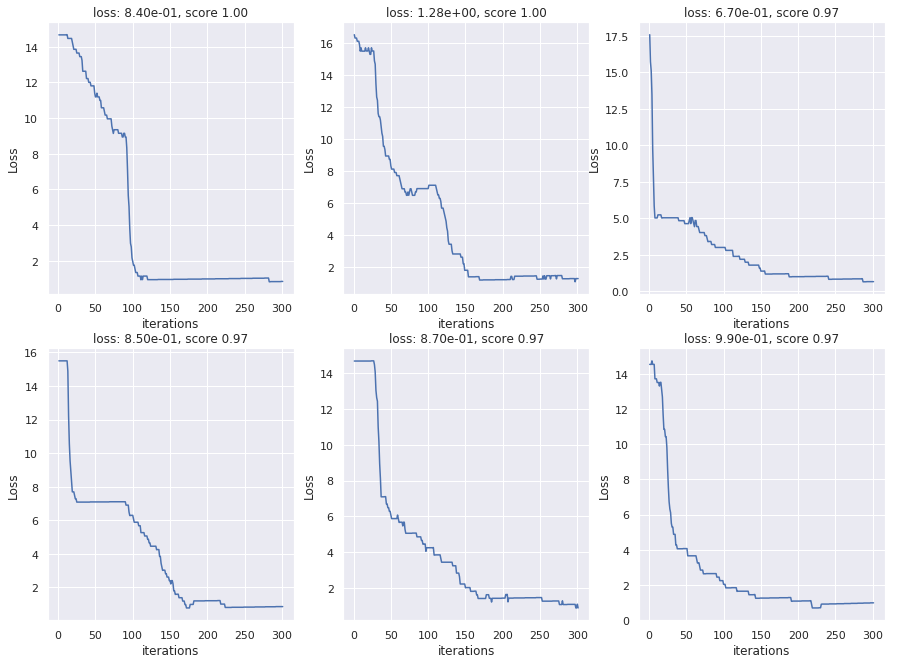

In [4]:
best_models = analyze('iris.csv')
best_models

In this example, we saw that:

- LeakyReLu acts like Relu function in some situations.
- Maybe test accuracy becomes better that train accuracy.
- Momentum technique plays an important role in optimization path. All of 6 best architectures are using momentum.
- Choosing learning is tricky and help us to reach global minumum in less epochs. By choosing big values for learning rate, the training phase becomes unstable and the MLP class raises floting point overflow.
- Smaller batch size help us to reach global minimum faster.

## Satlog dataset

The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. In the sample database, the class of a pixel is coded as a number.


[More information in UCI repository](https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite))

In [5]:
hidden_layers = [(32, 16, 8), (10, 10, 10), (64,)]
activations = [Tanh(), Sigmoid(), ReLu()]
batch_sizes = [256]
epochs = [30]
mus = [0.95]
betas = [.2, .3]
etas = [.01]
alphas = [0.01, 0]

hidden_layer activation  epoch   eta  beta  alpha    mu  batch_size  \
0        (64,)       ReLu     30  0.01   0.3   0.00  0.95         256   
1        (64,)       Tanh     30  0.01   0.2   0.00  0.95         256   
2        (64,)       Tanh     30  0.01   0.3   0.00  0.95         256   
3        (64,)       ReLu     30  0.01   0.2   0.01  0.95         256   
4        (64,)    Sigmoid     30  0.01   0.2   0.00  0.95         256   
5        (64,)       ReLu     30  0.01   0.2   0.00  0.95         256   
6        (64,)       ReLu     30  0.01   0.3   0.01  0.95         256   

  test_score train_score  loss  
0       0.72        0.74  5.93  
1       0.71        0.74  6.19  
2       0.70        0.71  6.71  
3       0.68        0.70  7.39  
4       0.67        0.68  7.39  
5       0.66        0.68  7.38  
6       0.62        0.63  9.00

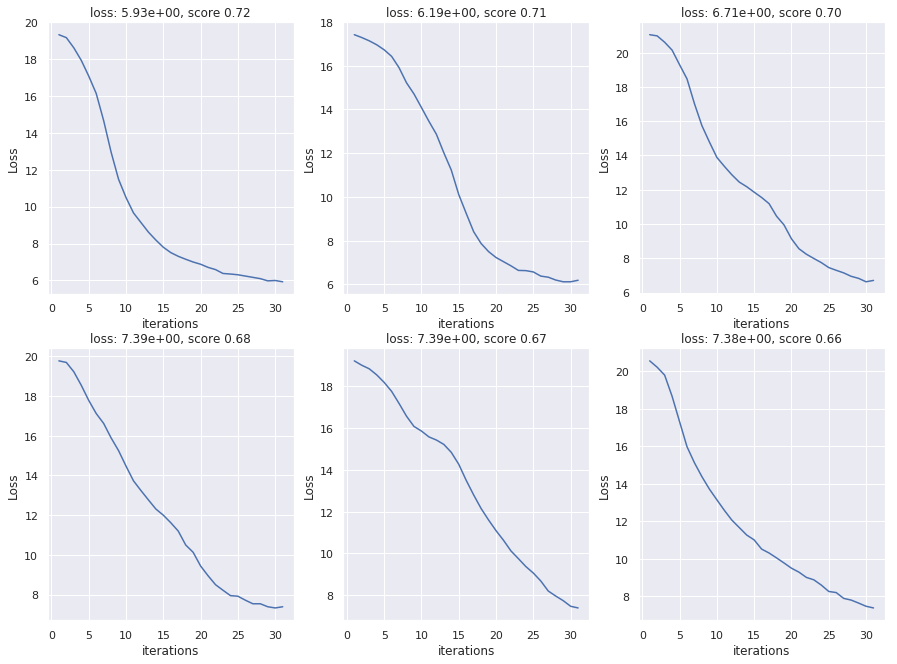

In [6]:
best_models = analyze('satlog.csv',n=7)

best_models

Again we trained a network with this specification and reach train accuracy **83.74%** and test accuracy **81.45%** in 100 epochs.

```
MLP([64], activation=ReLu(), batch_size=128, epochs=100, mu=0.95, beta=.3, eta=.02, alpha=.001, verbose=1, task='classification')
```
       

<img src="img/satlog-result.png?" width='50%'>

## MNIST dataset

<img src='img/mnist.png' width="500px">
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

[More information in lecun.com](http://yann.lecun.com/exdb/mnist/)

In [7]:
hidden_layers = [(64, 64), (128, 64), (128, 32, 32),(128, 32, 32)]
activations = [ReLu(),LeakyReLu(.03)]
batch_sizes = [512]
epochs = [10]
mus = [0, .85]
betas = [.1,.2]
etas = [.001,.01]
alphas = [.001,0]

hidden_layer       activation  epoch   eta  beta  alpha    mu  batch_size  \
0    (128, 64)             ReLu     10  0.01   0.2  0.000  0.85         512   
1    (128, 64)  LeakyReLu(0.03)     10  0.01   0.2  0.000  0.85         512   
2       (128,)             ReLu     10  0.01   0.1  0.001  0.85         512   
3       (128,)             ReLu     10  0.01   0.1  0.000  0.85         512   
4     (64, 64)             ReLu     10  0.01   0.2  0.001  0.85         512   
5       (128,)  LeakyReLu(0.03)     10  0.01   0.1  0.000  0.85         512   

  test_score train_score   loss  
0       0.32        0.31  15.93  
1       0.29        0.28  16.58  
2       0.28        0.28  16.62  
3       0.28        0.27  16.73  
4       0.28        0.27  16.79  
5       0.27        0.28  16.67

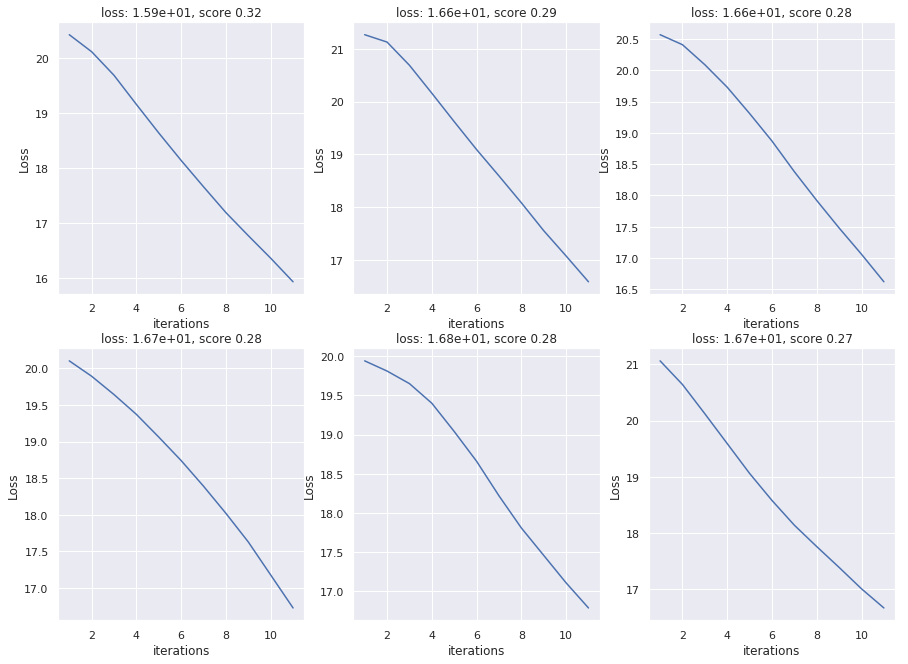

In [8]:
best_models = analyze('mnist.csv', n=6)
best_models

Again we trained a network with this architecture and reached the **87.91%** accuracy on train set and **86.89%** on test set in just 15 epochs.

    MLP([128, 64], activation=ReLu(), batch_size=64, epochs=15, mu=0.85, beta=.1, eta=.03, alpha=.001, verbose=1, task='classification')

<img src="img/mnist-result.png?" width='50%'>

To reach this accuracy with just 15 epochs we reduced the batch size from 512 to 64. This shows the important role of batch size in training a netwrok. Another interesting fact we found is the effect of number of epochs on overfitting problen. In above figure, you sae that from iteration 7-8 the network validation accuracy is reducing.

## Fashion mnist dataset

<img src='img/fashion-mnist-sprite.png' width="400px" height="100px">

Fashion-MNIST is a dataset of Zalando's article imagesâ€”consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

[More information in zalandoresearch's github repository](https://github.com/zalandoresearch/fashion-mnist)

In [9]:
hidden_layers = [(64, 64), (128, 64), (128, 32, 32),(128, 32, 32)]
activations = [ReLu(),LeakyReLu(.03)]
batch_sizes = [512]
epochs = [10]
mus = [0, .85]
betas = [.1,.2]
etas = [.001,.01]
alphas = [.001,0]

hidden_layer       activation  epoch   eta  beta  alpha    mu  batch_size  \
0      (128, 64)  LeakyReLu(0.03)     10  0.01   0.2  0.001  0.85         512   
1      (128, 64)             ReLu     10  0.01   0.2  0.001  0.85         512   
2      (128, 64)             ReLu     10  0.01   0.2  0.000  0.85         512   
3      (128, 64)  LeakyReLu(0.03)     10  0.01   0.2  0.000  0.85         512   
4       (64, 64)  LeakyReLu(0.03)     10  0.01   0.2  0.001  0.85         512   
5  (128, 32, 32)             ReLu     10  0.01   0.2  0.000  0.85         512   

  test_score train_score   loss  
0       0.48        0.48  12.04  
1       0.47        0.47  12.33  
2       0.47        0.47  12.22  
3       0.45        0.45  12.60  
4       0.42        0.42  13.48  
5       0.39        0.40  13.84

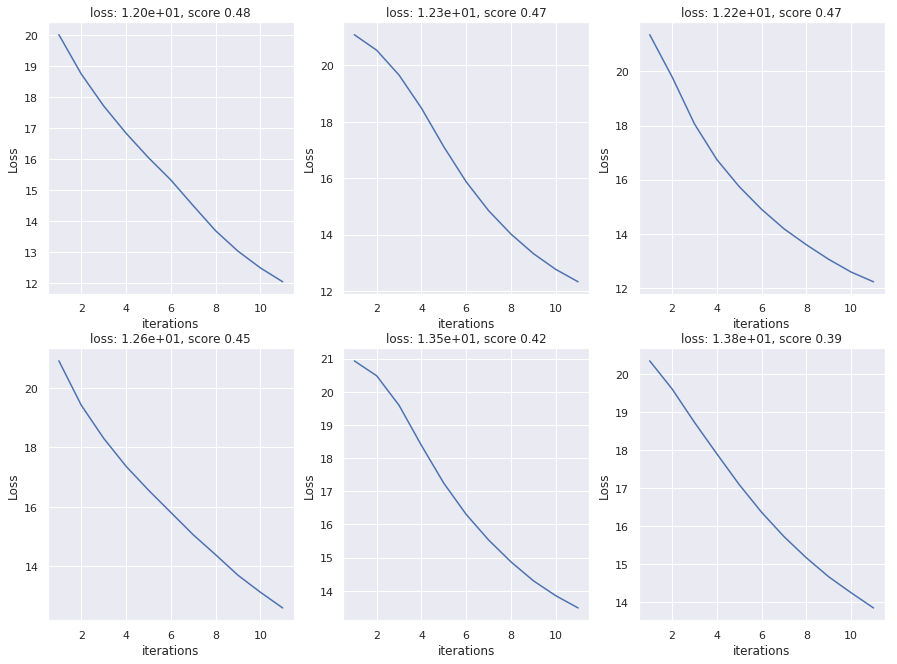

In [10]:
best_models = analyze('fashion.csv', n=6)
best_models

Again we trained a network with this architecture and reached the **76.78%** accuracy on train set and **75.36%** on test set in just 10 epochs.

    MLP([128, 64], activation=LeakyReLu(.03), batch_size=64, epochs=10, mu=0.85, beta=.2, eta=.01, alpha=.001, verbose=1, task='classification')

<img src="img/fashion-result.png?" width='50%'>

The above figures shows that, unlike iris dataset, the validation accuracy is always lower that training accuracy. 

# Concolusion

In this excersice, we implemented a simple neural network from scratch with matrix form formulations which is very important where the number of neurons and layers are large. Our implementation, do both regression and classification tasks with just setting an argument. All of the preprocessing reguirements such as scaling and encoding are done by `MLP` class automatically. To find appropriate network for a specific dataset, we implpemented a `GridSearch` class which uses **parallelization** techniques and finds optimal architecture among all possible solutions. To show the results, we tested 4 different datasets which is used by many researchers for classification tasks. The results shows the important role of batch size, number of epochs and learning rate for training a network.